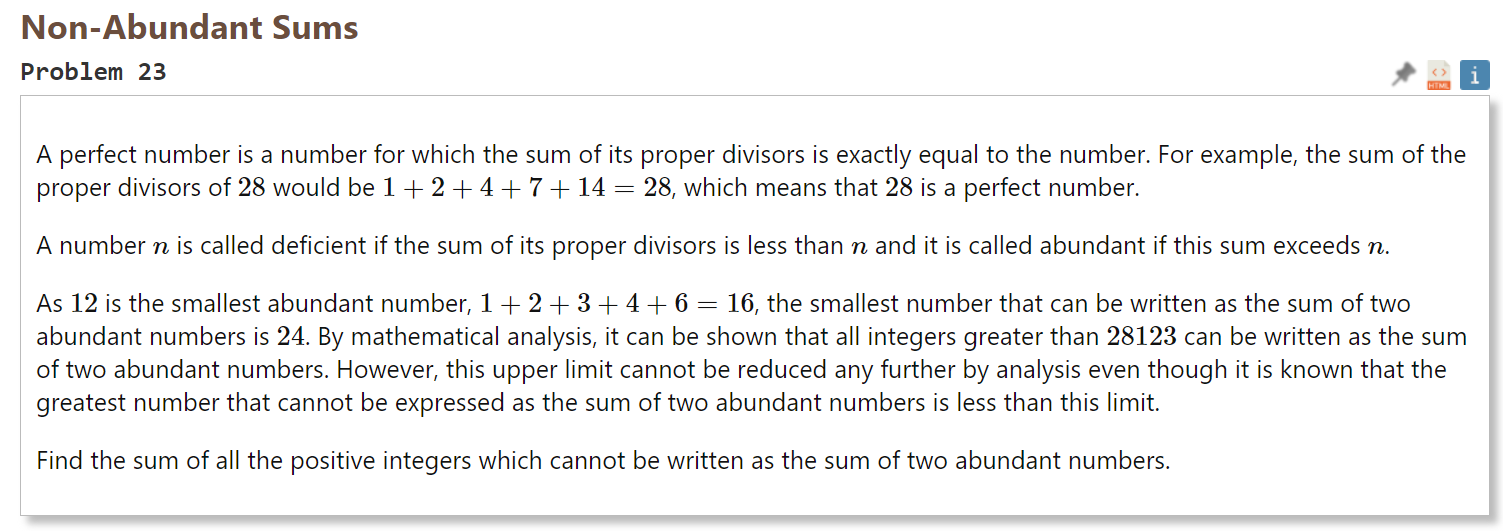

# First Try

if sum(factors(a)) > a, sum(factors(b)) > b and a + b = c => 

Below function is what was wrong, I was counting to 2 past which meant I could count a divisor above the square twice

In [46]:
# INCORRECT
def sum_factors(num):
    total = 1
    for f in range(2, int(num**0.5)+2):
        if num%f==0:
            f2 = num//f
            total += f
            if f!=f2:
                total += f2
    return total

# CORRECT
def sum_factors(num):
    total = 1
    for f in range(2, int(num**0.5)+1):
        if num%f==0:
            f2 = num//f
            total += f
            if f!=f2:
                total += f2
    return total

In [47]:
def abundant(n):
    found = []
    for num in range(11, n+1):
        if sum_factors(num) > num:
            found.append(num)
    return found

In [50]:
def non_abundant(n):
    abundant_nums = abundant(n)
    all_sums = {num1 + num2 for num1 in abundant_nums for num2 in abundant_nums}
    return sum({i for i in range(n+1)} - all_sums)

In [51]:
%%timeit
non_abundant(28123)

2.51 s ± 50.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# Second (Correct) Try

- Find all abundant numbers up to 28123
- Find the sums of all combinations of 2 of them (we can sum the same abundant number as shown 24 is the smallest)
- Remove those from all numbers up to 28123 and sum those

In [18]:
def sum_divisors(n):
    total = 1
    for div in range(2, int(n**(0.5)) + 1):
        other_div = n // div
        if n / div == other_div:
            total += div
            if div != other_div:
                total += other_div
    return total

In [19]:
assert sum_divisors(28) == 28
assert sum_divisors(12) == 16
assert sum_divisors(3) == 1

In [9]:
def abundant_nums_to(n):
    abundant_nums_to = []
    for num in range(3, n):
        if num < sum_divisors(num):
            abundant_nums_to.append(num)
    return abundant_nums_to

In [43]:
def main2():
    all_abundant = abundant_nums_to(28123)
    sum_same = [num1 + num2 for num1 in all_abundant for num2 in all_abundant]
    return sum(list(set([n for n in range(1, 28123)]) - set(sum_same)))

In [45]:
%%timeit
main2()

4.25 s ± 67.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


This time its correct - it was the sum_factors function that was wrong last time, but my last function is faster so I will make it faster altogether below

## Faster

In [53]:
def abundant(n):
    found = []
    for num in range(11, n+1):
        if sum_factors(num) > num:
            found.append(num)
    return found

In [59]:
%%timeit
abundant(28123)

198 ms ± 17.8 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [54]:
def abundant_nums_to(n):
    abundant_nums_to = []
    for num in range(11, n+1):
        if num < sum_divisors(num):
            abundant_nums_to.append(num)
    return abundant_nums_to

In [58]:
%%timeit
abundant_nums_to(28123)

345 ms ± 41 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


They are indentical so the sum_divisors function must be slower

In [60]:
def sum_factors(num):
    total = 1
    for f in range(2, int(num**0.5)+1):
        if num%f==0:
            f2 = num//f
            total += f
            if f!=f2:
                total += f2
    return total

In [61]:
def sum_divisors(n):
    total = 1
    for div in range(2, int(n**(0.5)) + 1):
        other_div = n // div
        if n / div == other_div:
            total += div
            if div != other_div:
                total += other_div
    return total

In [62]:
%%timeit
sum_factors(102343242)

543 µs ± 22.8 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [63]:
%%timeit
sum_divisors(102343242)

1 ms ± 108 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


Probably due to not using modulus so will change that and check

In [64]:
def sum_divisors(n):
    total = 1
    for div in range(2, int(n**(0.5)) + 1):
        if n%div == 0:
            total += div
            other_div = n / div
            if div != other_div:
                total += other_div
    return total

In [65]:
%%timeit
sum_divisors(102343242)

511 µs ± 22.7 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [68]:
# Not storing n / div is unsurprisingly slower
def sum_divisors(n):
    total = 1
    for div in range(2, int(n**(0.5)) + 1):
        if n%div == 0:
            total += div
            if div != n / div:
                total += n / div
    return total

Check again

In [84]:
def sum_divisors(n):
    total = 1
    for div in range(2, int(n**(0.5)) + 1):
        if n%div == 0:
            total += div
            other_div = n / div
            if div != other_div:
                total += other_div
    return total

In [50]:
def non_abundant(n):
    abundant_nums = abundant(n)
    all_sums = {num1 + num2 for num1 in abundant_nums for num2 in abundant_nums}
    return sum({i for i in range(n+1)} - all_sums)

In [89]:
%%timeit
non_abundant(28123)

2.81 s ± 125 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [43]:
def main2():
    all_abundant = abundant_nums_to(28123)
    sum_same = [num1 + num2 for num1 in all_abundant for num2 in all_abundant]
    return sum(list(set([n for n in range(1, 28123)]) - set(sum_same)))

In [91]:
%%timeit
main2()

4.29 s ± 294 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Probably due to there being duplicate sums and the older version used a set to remove these at the start - we do turn it into a set in the new version but I guess its much faster to define it as a set so that it doesnt wast time adding duplicates then taking them away after, we also dont need to turn it into a list before summing

In [92]:
def main2():
    all_abundant = abundant_nums_to(28123)
    sum_same = {num1 + num2 for num1 in all_abundant for num2 in all_abundant}
    return sum(list(set([n for n in range(1, 28123)]) - sum_same))

In [93]:
%%timeit
main2()

2.64 s ± 78.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [96]:
def main2():
    all_abundant = abundant_nums_to(28123)
    sum_same = {num1 + num2 for num1 in all_abundant for num2 in all_abundant}
    return sum(set([n for n in range(1, 28123)]) - sum_same)

In [97]:
%%timeit
main2()

2.61 s ± 145 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
